## Install 

If you do not have the Python InterOp library installed, then you can do the following:

    $ pip install -f https://github.com/Illumina/interop/releases/latest interop

You can verify that InterOp is properly installed:

    $ python -m interop --test

## Before you begin
If you plan to use this tutorial in an interactive fashion, then you should download an example run folder for an Illumina sequencer. For example, you may download and extract this example run folder: [MiSeqDemo](https://github.com/Illumina/interop/releases/download/v1.0.6/MiSeqDemo.zip)

Please change the path below so that it points at the run folder you wish to use:

In [1]:
run_folder = r"D:\RTA.Data\InteropData\MiSeqDemo"

## Creating the Q-score Histogram

This tutorial demonstrates how to plot the SAV Q-score histogram in Python using the InterOp library.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from interop import py_interop_plot, py_interop_run_metrics, py_interop_run

In [6]:
run_metrics = py_interop_run_metrics.run_metrics()

In [7]:
valid_to_load = py_interop_run.uchar_vector(py_interop_run.MetricCount, 0)
valid_to_load[py_interop_run.Q]=1

In [8]:
run_metrics.read(run_folder, valid_to_load)

In [9]:
bar_data = py_interop_plot.bar_plot_data()
boundary = 30
options = py_interop_plot.filter_options(run_metrics.run_info().flowcell().naming_method())

In [10]:
py_interop_plot.plot_qscore_histogram(run_metrics, options, bar_data, boundary)

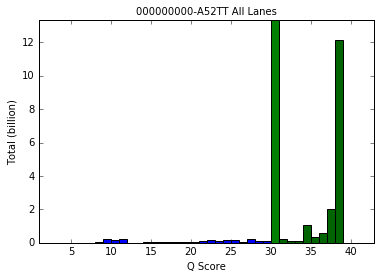

In [11]:
for i in xrange(bar_data.size()):
    x = [bar_data.at(i).at(j).x() for j in xrange(bar_data.at(i).size())]
    y = [bar_data.at(i).at(j).y() for j in xrange(bar_data.at(i).size())]
    w = [bar_data.at(i).at(j).width() for j in xrange(bar_data.at(i).size())]
    plt.bar(x, y, width=w, color=bar_data.at(i).color())
plt.xlabel(bar_data.xyaxes().x().label(), fontsize=10)
plt.ylabel(bar_data.xyaxes().y().label(), fontsize=10)
plt.title(bar_data.title(), fontsize=10)
plt.ylim([bar_data.xyaxes().y().min(), bar_data.xyaxes().y().max()])
plt.xlim([bar_data.xyaxes().x().min(), bar_data.xyaxes().x().max()])
plt.show()